### Steps to build End to End ML project 

supervise, unsupervise, reinforcement, deeplearning, gen-ai

what is Machine Learning  ?

what is Supervise Machine Learning ? 

Making Predictions based on past experiences (data)


A computer program (ML Algorithms) which improves it's performance (P) on a given task (T) with experience (E)

    P - accuracy/error metrices  (Performance)
    T - regression/classification/clustering/anomaly detection/object detection/LLM (Task)
    E - Data used to train machine learning algorithms (Experience)

    free lunch theorem 

### Supervise ML 

    Label Data, we train machine learning model with input and output examples 

    input is known as features 
    output is known as label, target

    A ML program which is trained using features and labels known as supervised model 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
mpg = sns.load_dataset('mpg')

In [4]:
mpg.shape
# (instances, features)

(398, 9)

In [3]:
mpg.info()
# info - quick view columns, data types, and missing values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


## 1. Understanding the problem / Looking at the Big Picture 

    get domain knowledge

    objective and expectation 

        mpg prediction based on given features 

## EDA

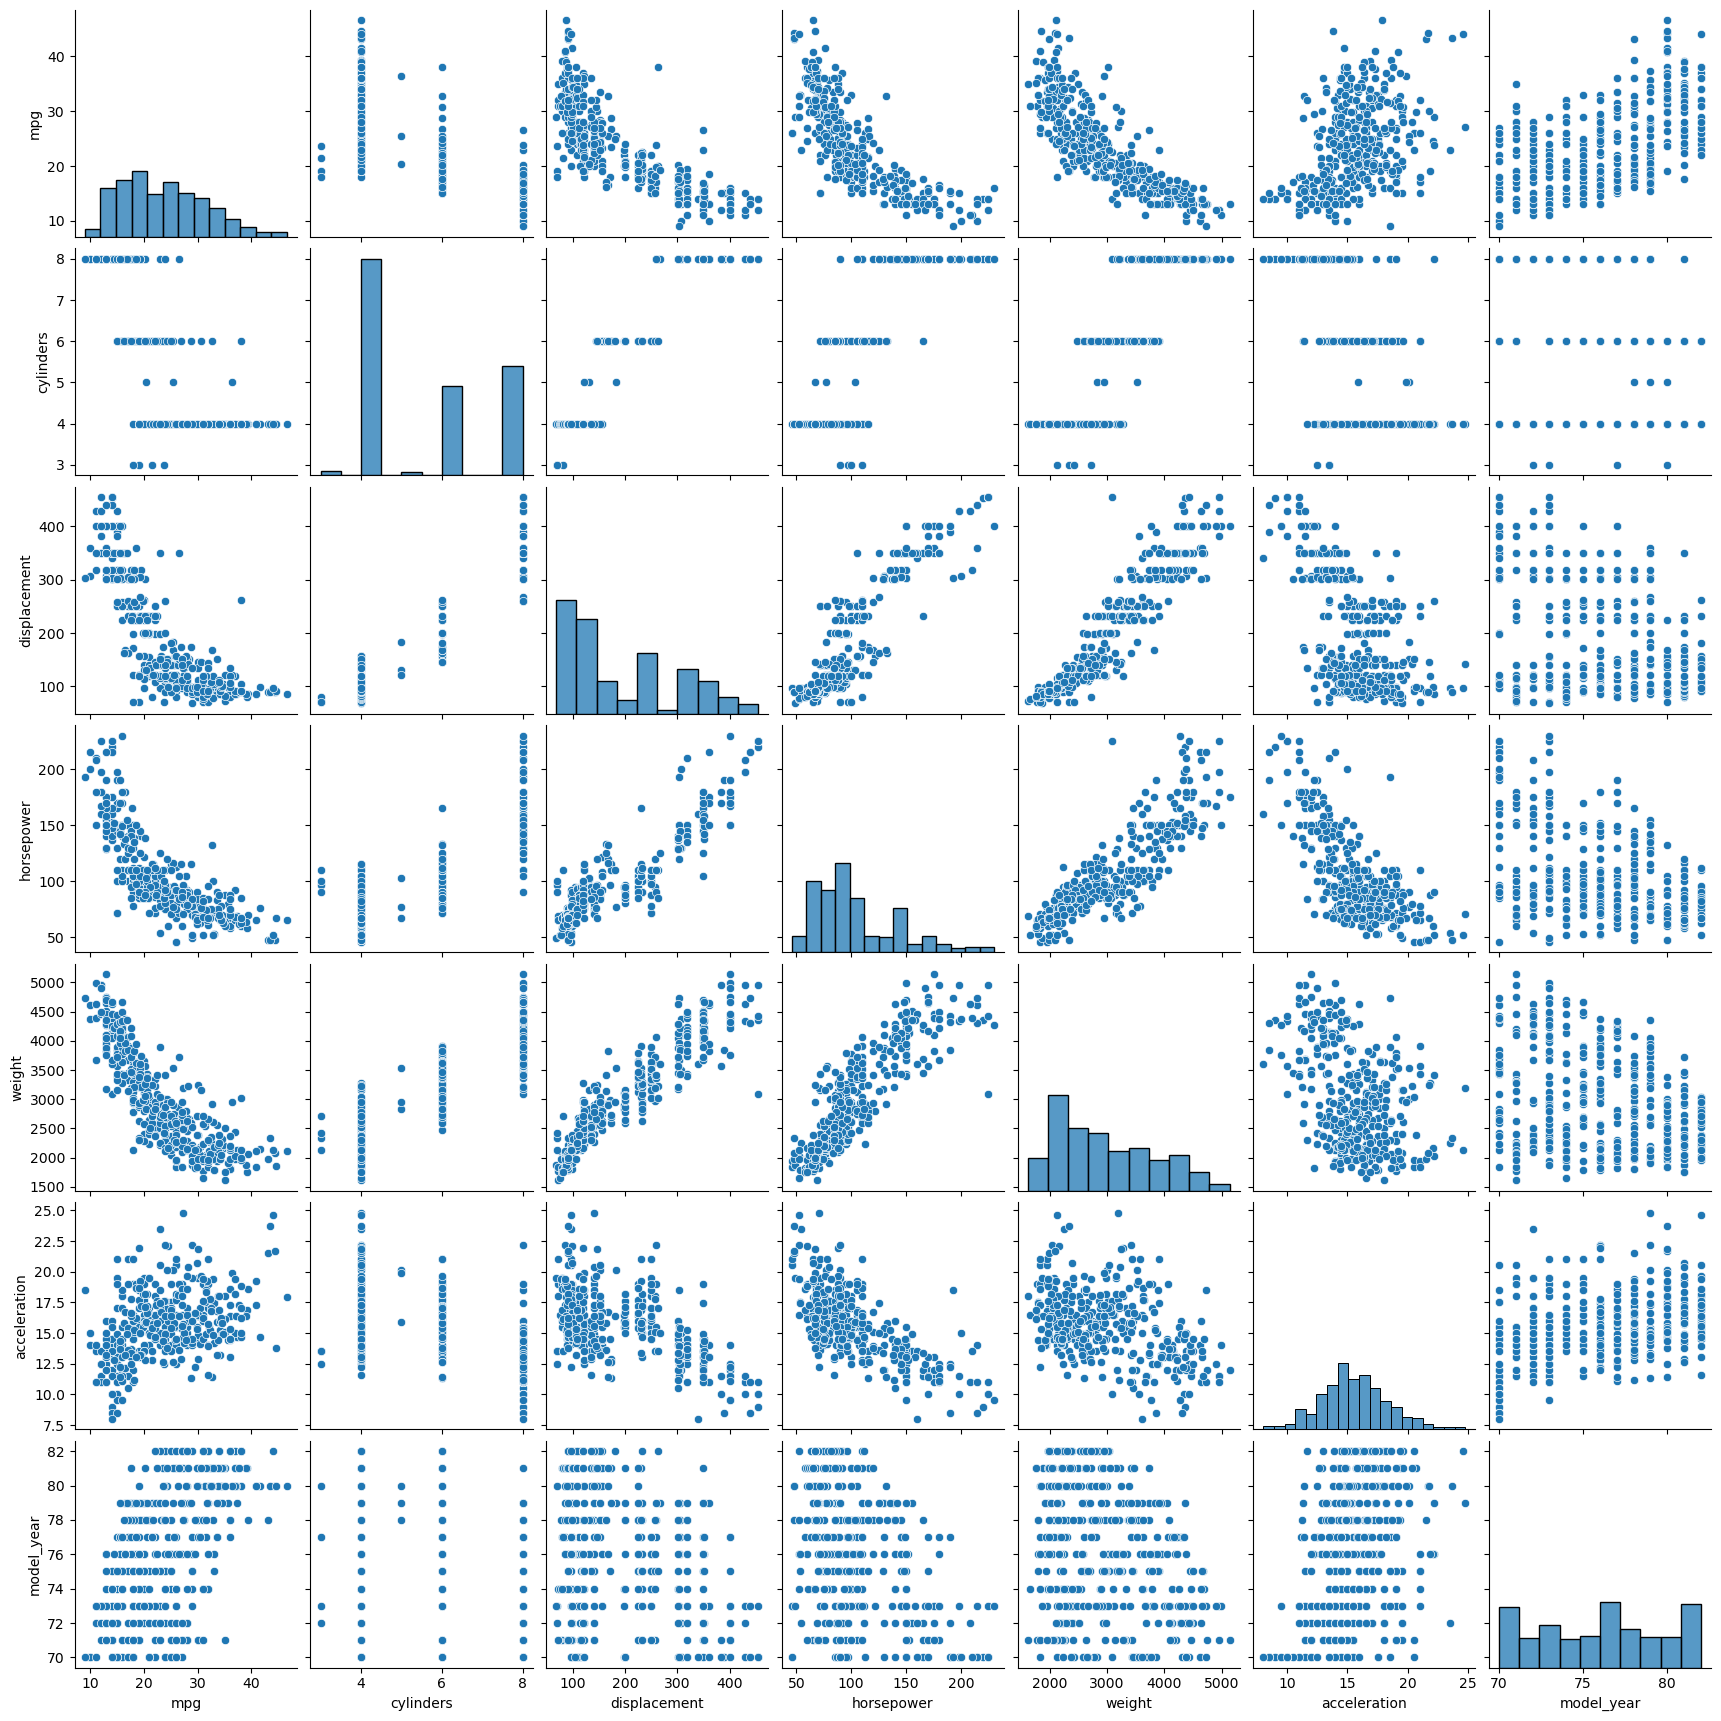

In [6]:
sns.pairplot(mpg)
plt.show()
# warning - use this only if you have less amount of data

### Label - mpg (y) 

### Features - X

In [10]:
features = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']

In [11]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [19]:
mpg.corrwith(mpg['mpg'], numeric_only=True).sort_values(ascending=False, key=lambda v: abs(v))

mpg             1.000000
weight         -0.831741
displacement   -0.804203
horsepower     -0.778427
cylinders      -0.775396
model_year      0.579267
acceleration    0.420289
dtype: float64

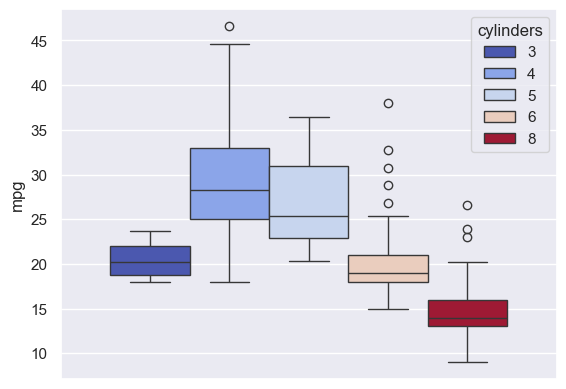

In [26]:
sns.set_theme()
sns.boxplot(y="mpg", hue="cylinders", data=mpg, palette='coolwarm')
plt.show()

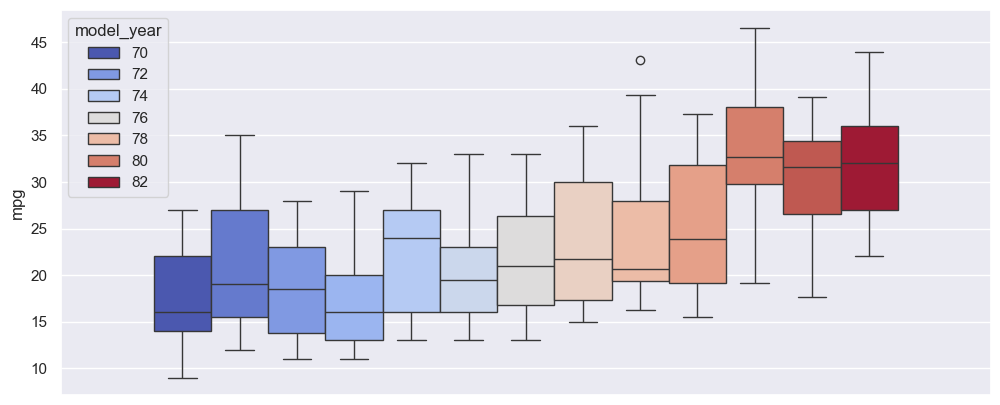

In [28]:
plt.figure(figsize=(12, 5))
sns.boxplot(y="mpg", hue="model_year", data=mpg, palette='coolwarm')
plt.show()

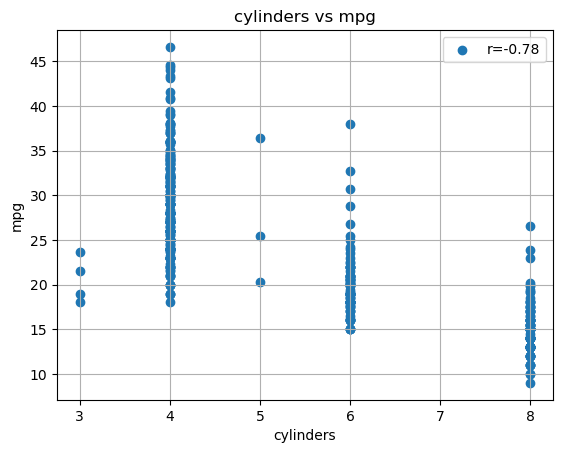

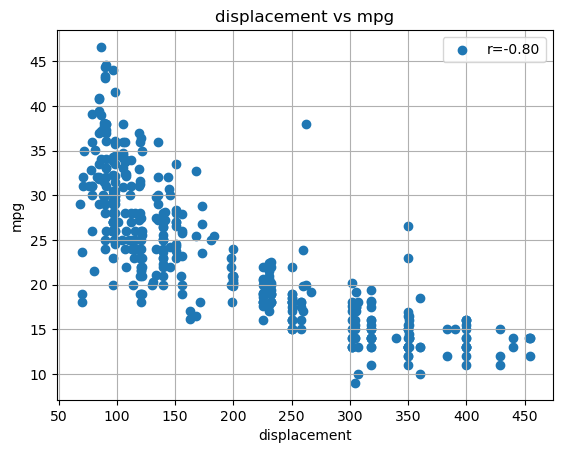

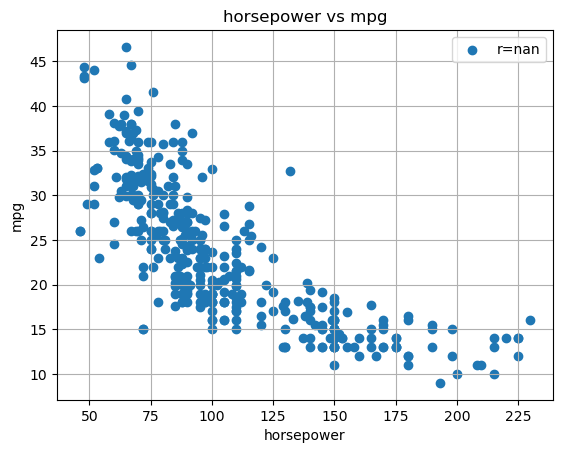

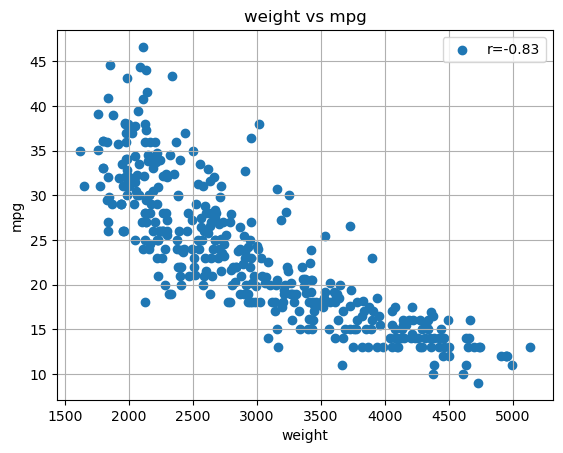

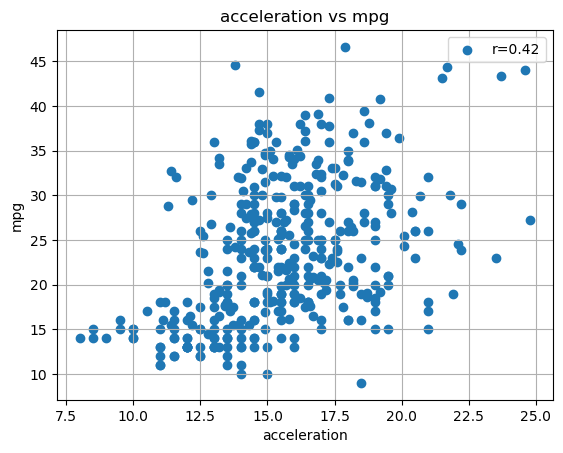

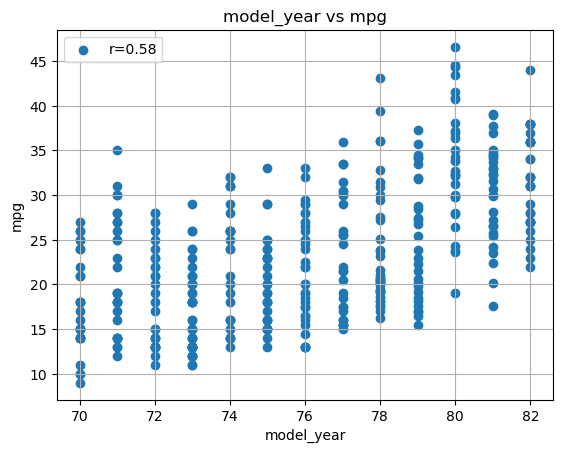

In [20]:
for feature in features:
    r = np.corrcoef(x=mpg[feature], y=mpg["mpg"])[0, 1]
    plt.scatter(mpg[feature], mpg["mpg"], label=f"r={r:.2f}")
    plt.xlabel(feature)
    plt.ylabel("mpg")
    plt.grid()
    plt.title(f"{feature} vs mpg")
    plt.legend()
    plt.show()
# feature selection   feature vs target

# Feature engineering 

    selecting best features according problem statement 

In [31]:
mpg['name'].nunique()

305

In [32]:
mpg.shape

(398, 9)

In [35]:
mpg["origin"].nunique()

3

In [36]:
mpg["origin"].unique()

array(['usa', 'japan', 'europe'], dtype=object)

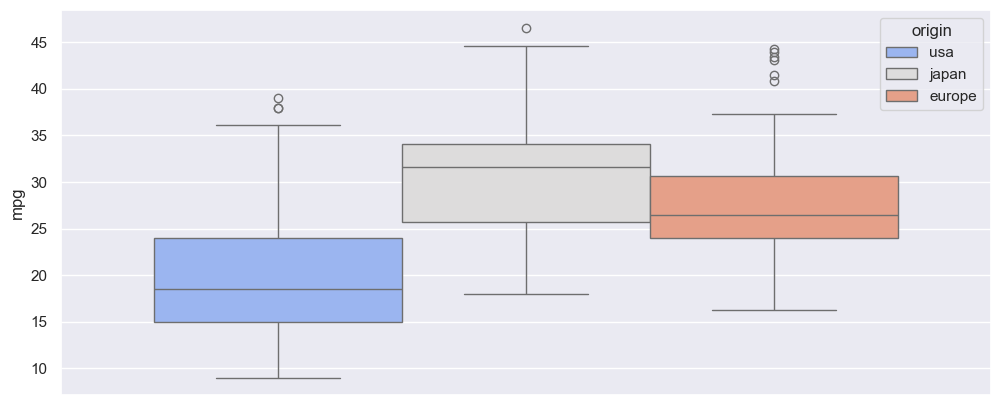

In [37]:
plt.figure(figsize=(12, 5))
sns.boxplot(y="mpg", hue="origin", data=mpg, palette='coolwarm')
plt.show()

In [41]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
ord_enc.fit_transform(mpg[["origin"]]) # europe, japan, usa -> 0, 1, 2

array([[2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [1.],
       [2.],
       [2.],
       [2.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [1.],
       [2.],
       [1.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [2.],
       [1.],
       [2.],
       [0.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [1.],
       [2.],
       [2.],
       [2.],
       [2.],
       [0.],

In [40]:
mpg['origin'].apply(lambda v: 3 if v == 'japan' else 2 if v == 'europe' else 1)

0      1
1      1
2      1
3      1
4      1
      ..
393    1
394    2
395    1
396    1
397    1
Name: origin, Length: 398, dtype: int64

In [38]:
# Label or Oridinal Encoding
mpg['origin'].map({'usa': 1, 'europe': 2, 'japan': 3})

0      1
1      1
2      1
3      1
4      1
      ..
393    1
394    2
395    1
396    1
397    1
Name: origin, Length: 398, dtype: int64

## Encoding 

    converting category data into numerical data

        one hot encoding - Nominal Categorical Data

            japan    europe     usa
              1/0     1/0        1/0

        label encoding - Ordinal Categorical Data

                japan -> 3,  europe -> 2,  usa -> 1

                    

    origin       japan       usa       europe

    japan          1          0           0      
    usa            0          1           0
    usa            0          1           0
    japan
    usa
    japan
    europe
    europe
    japan
    usa
    europe

        

In [50]:
sample = mpg.sample(frac=0.05).copy()

In [51]:
sample.shape

(20, 9)

In [52]:
sample

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
332,29.8,4,89.0,62.0,1845,15.3,80,europe,vokswagen rabbit
247,39.4,4,85.0,70.0,2070,18.6,78,japan,datsun b210 gx
321,32.2,4,108.0,75.0,2265,15.2,80,japan,toyota corolla
248,36.1,4,91.0,60.0,1800,16.4,78,japan,honda civic cvcc
50,28.0,4,116.0,90.0,2123,14.0,71,europe,opel 1900
29,27.0,4,97.0,88.0,2130,14.5,71,japan,datsun pl510
209,19.0,4,120.0,88.0,3270,21.9,76,europe,peugeot 504
365,20.2,6,200.0,88.0,3060,17.1,81,usa,ford granada gl
204,32.0,4,85.0,70.0,1990,17.0,76,japan,datsun b-210
69,12.0,8,350.0,160.0,4456,13.5,72,usa,oldsmobile delta 88 royale


In [54]:
sample.head(7)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
332,29.8,4,89.0,62.0,1845,15.3,80,europe,vokswagen rabbit
247,39.4,4,85.0,70.0,2070,18.6,78,japan,datsun b210 gx
321,32.2,4,108.0,75.0,2265,15.2,80,japan,toyota corolla
248,36.1,4,91.0,60.0,1800,16.4,78,japan,honda civic cvcc
50,28.0,4,116.0,90.0,2123,14.0,71,europe,opel 1900
29,27.0,4,97.0,88.0,2130,14.5,71,japan,datsun pl510
209,19.0,4,120.0,88.0,3270,21.9,76,europe,peugeot 504


In [53]:
pd.get_dummies(sample["origin"]).astype(int)

,europe,japan,usa
332,1,0,0
247,0,1,0
321,0,1,0
248,0,1,0
50,1,0,0
29,0,1,0
209,1,0,0
365,0,0,1
204,0,1,0
69,0,0,1


In [55]:
from sklearn.preprocessing import OneHotEncoder

In [56]:
enc = OneHotEncoder()

In [63]:
enc.fit_transform(sample[["origin"]]).toarray()
# sparse matrix --> mostly --> zeros only stores postiions of ones to same memory do operations efficiently 

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [65]:
mpg.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

## ML 

    Data Modeling 

        divide data into train / testing 

        1. fix missing values and outliers
        2. convert category columns to numerical columns
        3. scaling 
        4. feature selection 

    why we need to divide data into training and testing ? 

    to calculate model performance unbiased we some data which is not exposed to model at all, it is know test data

### Sampling Techniques 

    a sample is a subset of data

## End to End ML project

    1. Look at Big Picture
    2. Divide data into features and target if problem is supervised [what kind of problem we are dealing with]
    3. Sampling - Divide data into two samples - one will be used to train ML model (train set) other one will to used to evalute model performance (test set)
    4. EDA - for feature selection, to get a mental picture of data
    5. Data Modeling - Deal with outliers and missing values, Encoding, Feature Engineering, Scaling - X - 2D array, y - 1D array
    6. Training and Evaluation of ML model
    7. Hyper parameter tuning or Regularization
    8. Generalization of Model, Saving the model
    9. Deploying the model or integrating model with system
    10. Monitoring ML model, retraining ML model time to time to let it be relevant with time

In [71]:
features = ['cylinders', 'displacement', 'horsepower', 'weight', 'model_year', 'origin']
target = "mpg"

In [73]:
# features X, target/label y
X = mpg[features]
y = mpg[target]

In [74]:
X.head()

,cylinders,displacement,horsepower,weight,model_year,origin
0,8,307.0,130.0,3504,70,usa
1,8,350.0,165.0,3693,70,usa
2,8,318.0,150.0,3436,70,usa
3,8,304.0,150.0,3433,70,usa
4,8,302.0,140.0,3449,70,usa


In [75]:
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [76]:
mpg.shape  # 70 % training  30 % testing  80-20  90-10

(398, 9)

In [81]:
train_size = int(mpg.shape[0] * 0.8)
train_size

318

In [82]:
# sequential sampling 
# first 80% values for training and rest 20% values of testing
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

In [85]:
print(X_train.shape, y_train.shape)
X_train.head()

(318, 6) (318,)


,cylinders,displacement,horsepower,weight,model_year,origin
0,8,307.0,130.0,3504,70,usa
1,8,350.0,165.0,3693,70,usa
2,8,318.0,150.0,3436,70,usa
3,8,304.0,150.0,3433,70,usa
4,8,302.0,140.0,3449,70,usa


In [84]:
y_train.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [86]:
X_test.shape

(80, 6)

In [87]:
X_test.head()

,cylinders,displacement,horsepower,weight,model_year,origin
318,4,134.0,90.0,2711,80,japan
319,4,120.0,75.0,2542,80,japan
320,4,119.0,92.0,2434,80,japan
321,4,108.0,75.0,2265,80,japan
322,4,86.0,65.0,2110,80,japan


In [88]:
y_test.head()

318    29.8
319    31.3
320    37.0
321    32.2
322    46.6
Name: mpg, dtype: float64

### Sample Bias

    if we select data sequentially then there are higher chances of sample bias


        garbage in garbage out

    first 80% values --> ham (message which is not spam)
    last 20% values --> spam 

        text message      label
            abcd...         ham
            sdgdag....      ham
              ...           ...
            alsdjfl          spam
            adfad            spam
            ....             ...


        categories --> ham

### Random Sampling 

In [93]:
mpg.index

RangeIndex(start=0, stop=398, step=1)

In [96]:
rm_idx = np.random.choice(mpg.index, mpg.shape[0], replace=False)
# uniform

In [97]:
rm_idx[:10]

array([161, 184, 284,  59,  13, 301,  61, 349, 103, 158])

In [100]:
mpg.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,usa,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,usa,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,usa,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,usa,amc ambassador dpl


In [99]:
mpg.loc[rm_idx[:10]]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
161,16.0,6,250.0,105.0,3897,18.5,75,usa,chevroelt chevelle malibu
184,25.0,4,140.0,92.0,2572,14.9,76,usa,capri ii
284,20.6,6,225.0,110.0,3360,16.6,79,usa,dodge aspen 6
59,23.0,4,97.0,54.0,2254,23.5,72,europe,volkswagen type 3
13,14.0,8,455.0,225.0,3086,10.0,70,usa,buick estate wagon (sw)
301,34.2,4,105.0,70.0,2200,13.2,79,usa,plymouth horizon
61,21.0,4,122.0,86.0,2226,16.5,72,usa,ford pinto runabout
349,34.1,4,91.0,68.0,1985,16.0,81,japan,mazda glc 4
103,11.0,8,400.0,150.0,4997,14.0,73,usa,chevrolet impala
158,16.0,8,318.0,150.0,4498,14.5,75,usa,plymouth grand fury


In [101]:
X_rn = X.loc[rm_idx]
y_rn = y.loc[rm_idx]

In [102]:
X_rn

,cylinders,displacement,horsepower,weight,model_year,origin
161,6,250.0,105.0,3897,75,usa
184,4,140.0,92.0,2572,76,usa
284,6,225.0,110.0,3360,79,usa
59,4,97.0,54.0,2254,72,europe
13,8,455.0,225.0,3086,70,usa
...,...,...,...,...,...,...
234,4,151.0,88.0,2740,77,usa
121,8,318.0,150.0,3399,73,usa
1,8,350.0,165.0,3693,70,usa
19,4,97.0,46.0,1835,70,europe


In [103]:
# Random sampling 
# first 80% values for training and rest 20% values of testing
train_size = int(mpg.shape[0] * 0.8)
train_size
X_train, y_train = X_rn[:train_size], y_rn[:train_size]
X_test, y_test = X_rn[train_size:], y_rn[train_size:]

In [104]:
X_train.head()

,cylinders,displacement,horsepower,weight,model_year,origin
161,6,250.0,105.0,3897,75,usa
184,4,140.0,92.0,2572,76,usa
284,6,225.0,110.0,3360,79,usa
59,4,97.0,54.0,2254,72,europe
13,8,455.0,225.0,3086,70,usa


In [105]:
y_train.head()

161    16.0
184    25.0
284    20.6
59     23.0
13     14.0
Name: mpg, dtype: float64

In [106]:
from sklearn.model_selection import train_test_split

In [ ]:
np.random.seed(12345)
# to reproduce same result while running the notebook multiple time

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)
# random sampling 

In [109]:
!mkdir mpg_data
!mkdir mpg_data/train
!mkdir mpg_data/test

In [110]:
!ls mpg_data/

test  train


In [113]:
X_train.to_csv("mpg_data/train/features.csv", index=False)
y_train.to_csv("mpg_data/train/target.csv", index=False)

In [114]:
!head mpg_data/train/features.csv

cylinders,displacement,horsepower,weight,model_year,origin
6,250.0,88.0,3021,73,usa
4,120.0,88.0,3270,76,europe
6,199.0,97.0,2774,70,usa
4,98.0,68.0,2155,78,usa
4,97.0,54.0,2254,72,europe
8,260.0,110.0,3365,78,usa
8,318.0,150.0,3755,76,usa
8,305.0,145.0,3425,78,usa
8,302.0,129.0,3725,79,usa


In [115]:
X_test.to_csv("mpg_data/test/features.csv", index=False)
y_test.to_csv("mpg_data/test/target.csv", index=False)

In [117]:
X_train

,cylinders,displacement,horsepower,weight,model_year,origin
311,4,98.0,70.0,2120,80,usa
339,4,151.0,84.0,2635,81,usa
115,8,350.0,145.0,4082,73,usa
286,8,302.0,129.0,3725,79,usa
88,8,302.0,137.0,4042,73,usa
...,...,...,...,...,...,...
34,6,225.0,105.0,3439,71,usa
357,4,119.0,100.0,2615,81,japan
382,4,108.0,70.0,2245,82,japan
129,4,79.0,67.0,1950,74,japan


In [118]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 318 entries, 311 to 285
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     318 non-null    int64  
 1   displacement  318 non-null    float64
 2   horsepower    312 non-null    float64
 3   weight        318 non-null    int64  
 4   model_year    318 non-null    int64  
 5   origin        318 non-null    object 
dtypes: float64(2), int64(3), object(1)
memory usage: 17.4+ KB


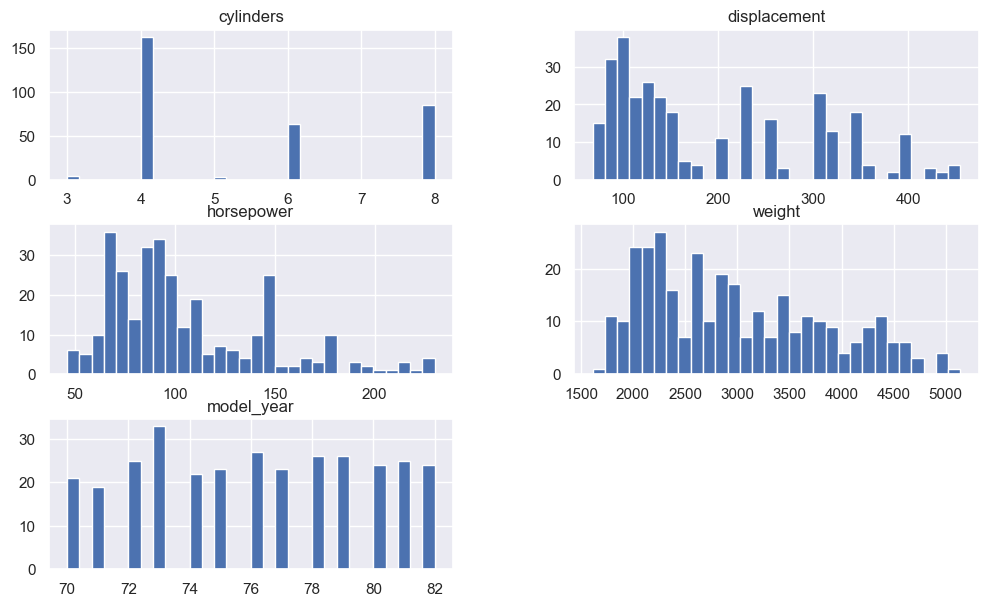

In [123]:
X_train.hist(bins=30, figsize=(12, 7))
plt.show()

In [128]:
from sklearn.preprocessing import OneHotEncoder

In [130]:
encoder = OneHotEncoder()
encoder.fit(X_train[["origin"]]) # fit -> learning, transform --> Transformers    / predict --> models
# origin -> europe, japan, usa -> 1 0 0, 0 1 0, 0 0 1
encoder.categories_

[array(['europe', 'japan', 'usa'], dtype=object)]

In [191]:
train_category = pd.DataFrame(encoder.transform(X_train[["origin"]]).toarray(), columns=encoder.categories_[0], index=X_train.index)
train_category.shape

(318, 3)

In [206]:
# on = "common column" # np.hstack((X_train, cat))
X_train_tr = pd.merge(X_train.drop("origin", axis=1), train_category, left_index=True, right_index=True)

In [207]:
X_train_tr.shape

(318, 8)

In [208]:
#X_train_tr[['europe', 'japan', 'usa']] = train_category

In [209]:
X_train_tr.head()

,cylinders,displacement,horsepower,weight,model_year,europe,japan,usa
311,4,98.0,70.0,2120,80,0.0,0.0,1.0
339,4,151.0,84.0,2635,81,0.0,0.0,1.0
115,8,350.0,145.0,4082,73,0.0,0.0,1.0
286,8,302.0,129.0,3725,79,0.0,0.0,1.0
88,8,302.0,137.0,4042,73,0.0,0.0,1.0


In [210]:
from sklearn.impute import SimpleImputer

In [211]:
impute = SimpleImputer(strategy='median')
# cylinder , dsp --> 

In [212]:
impute.fit(X_train_tr) # ? 

SimpleImputer(strategy='median')

In [213]:
impute.statistics_

array([4.0000e+00, 1.5100e+02, 9.4000e+01, 2.8225e+03, 7.6000e+01,
       0.0000e+00, 0.0000e+00, 1.0000e+00])

In [214]:
X_train_tr.isna().sum()

cylinders       0
displacement    0
horsepower      6
weight          0
model_year      0
europe          0
japan           0
usa             0
dtype: int64

In [215]:
impute.transform(X_train_tr)

array([[  4.,  98.,  70., ...,   0.,   0.,   1.],
       [  4., 151.,  84., ...,   0.,   0.,   1.],
       [  8., 350., 145., ...,   0.,   0.,   1.],
       ...,
       [  4., 108.,  70., ...,   0.,   1.,   0.],
       [  4.,  79.,  67., ...,   0.,   1.,   0.],
       [  8., 305., 130., ...,   0.,   0.,   1.]])

In [216]:
X_train_tr = pd.DataFrame(impute.transform(X_train_tr), columns=X_train_tr.columns)
X_train_tr.isna().sum()

cylinders       0
displacement    0
horsepower      0
weight          0
model_year      0
europe          0
japan           0
usa             0
dtype: int64

In [217]:
X_train_tr.head()

,cylinders,displacement,horsepower,weight,model_year,europe,japan,usa
0,4.0,98.0,70.0,2120.0,80.0,0.0,0.0,1.0
1,4.0,151.0,84.0,2635.0,81.0,0.0,0.0,1.0
2,8.0,350.0,145.0,4082.0,73.0,0.0,0.0,1.0
3,8.0,302.0,129.0,3725.0,79.0,0.0,0.0,1.0
4,8.0,302.0,137.0,4042.0,73.0,0.0,0.0,1.0


#### Stratified Sampling 
#### Scaling 
#### ML Train 

#### pipeline